# Lavadora

### Codigo Lavadora

In [33]:
SEED = 46079990

import itertools as it
from sklearn.model_selection import cross_validate
import pandas as pd
import numpy as np
import datetime


def get_best_hyperparameter_config(algorithm_class, data, dictionary, debug=False, logger=False):
    if debug:
        t0 = datetime.datetime.now()
        print("=====================================")
        print(t0)

    k_folds = 5
    best_config = {}
    best_score = 0

    allNames = []
    for i in dictionary:
        allNames.append(i)

    combinations = it.product(*(dictionary[Name] for Name in allNames))
    combinations_list = list(combinations)
    if combinations_list == [()]:
        algorithm_instance = algorithm_class()
        X = data[:, :-1]
        y = data[:, -1]
        if logger:
            print({})
        cv_results = cross_validate(algorithm_instance, X=X, y=y, cv=5)
        mean = np.sum(cv_results["test_score"] / k_folds)
        best_score = mean
        best_config = {}
        
    else:
        for combination in combinations_list:
            kwargs = {}
            for i in range(len(allNames)):
                kwargs.update({allNames[i]: combination[i]})
                X = data[:, :-1]
                y = data[:, -1]
                algorithm_instance = algorithm_class(**kwargs)
                if logger:
                    print(kwargs)
                cv_results = cross_validate(algorithm_instance, X=X, y=y, cv=5)
                mean = np.sum(cv_results["test_score"] / k_folds)
                if mean > best_score:
                    best_score = mean
                    best_config = kwargs
    if debug:
        t1 = datetime.datetime.now()
        print(t1)
        print(algorithm_class)
        print("Best best_score: " + str(best_score))
        print("Best config: " + str(best_config))
        print("Elapsed time: " + str(t1-t0))
        print("=====================================")


    return best_score, best_config
#######################################################################################################################
from sklearn.neighbors import KNeighborsClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""
def knn_grid_search(data, debug=True, logger=True):
    dictionary={
        "n_neighbors": [1,3,5,10,20],
        "weights": ["uniform", "distance"]
    }
    config, score = get_best_hyperparameter_config(KNeighborsClassifier, data, dictionary, debug, logger)
    return "Knn", config, score
#######################################################################################################################
from sklearn.tree import DecisionTreeClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
"""
def decision_tree_grid_search(data, debug=True, logger=True):
    dictionary = {
        "splitter": ["best", "random"],
        "random_state": [SEED],
        "max_depth": [None, 10, 100, 1000],
        "criterion":["gini", "entropy"]
    }
    config, score = get_best_hyperparameter_config(DecisionTreeClassifier, data, dictionary, debug, logger)
    return "decision_tree", config, score

#######################################################################################################################
from sklearn.ensemble import RandomForestClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""
def random_forest_grid_search(data, debug=True, logger=True):
    dictionary = {
        "random_state": [SEED],
        "max_depth": [None, 10, 100, 1000],
        "criterion": ["gini", "entropy"],
        "n_estimators" : [100, 500, 100],
    }
    config, score = get_best_hyperparameter_config(RandomForestClassifier, data, dictionary, debug, logger)
    return "random_forest", config, score

#######################################################################################################################
from sklearn.linear_model import LogisticRegression
"""
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
"""
def logistic_regression_grid_search(data, debug=True, logger=True):
    dictionary = {
        "random_state": [SEED],
        "penalty": ["l1", "l2"],
    }
    config, score = get_best_hyperparameter_config(LogisticRegression, data, dictionary, debug, logger)
    return "logistic_regression", config, score


#######################################################################################################################
from sklearn.svm import SVC
"""
https://scikit-learn.org/stable/modules/svm.html,
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
"""
def svm_grid_search(data, debug=True, logger=True):
    dictionary = {
        "random_state": [SEED],
        "kernel": ["poly", "rbf", "sigmoid"],
        "gamma": ['auto','scale', 0.01, 0.1, 1, 10, 100]
    }
    config, score = get_best_hyperparameter_config(SVC, data, dictionary, debug, logger)
    return "svm", config, score


#######################################################################################################################
from sklearn.linear_model import LogisticRegression
"""
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
"""
def logistic_regression_grid_search(data, debug=True, logger=True):
    dictionary = {
        "random_state": [SEED],
        "penalty": ["l1", "l2"],
    }
    config, score = get_best_hyperparameter_config(LogisticRegression, data, dictionary, debug, logger)
    return "logistic_regression", config, score


#######################################################################################################################
from sklearn.naive_bayes import GaussianNB
"""
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
"""
def gausian_naive_bayes_grid_search(data, debug=True, logger=True):
    dictionary = {

    }
    config, score = get_best_hyperparameter_config(GaussianNB, data, dictionary, debug, logger)
    return "gausian", config, score

#######################################################################################################################
from sklearn.neural_network import MLPClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
"""
def mlp_neural_netrwor_grid_search(data, debug=True, logger=True):

    dictionary = {
        "hidden_layer_sizes": [20,50,100],
        "max_iter": [5,10,15,50],
        "random_state": [0],
        "learning_rate_init": [0.01, 0.01,0.1],
        "activation":["relu", "identity", "logistic", "tanh"]
    }
    config, score = get_best_hyperparameter_config(MLPClassifier, data, dictionary, debug, logger)
    return "mlp_neural_network", config, score

##############################################################################################################################################################################################################################################
from sklearn.ensemble import AdaBoostClassifier
"""
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
"""
def ada_boost_grid_search(data, debug=True, logger=True):

    dictionary = {
        "n_estimators":[10,50,100], 
        "random_state":[SEED]
    }
    config, score = get_best_hyperparameter_config(AdaBoostClassifier, data, dictionary, debug, logger)
    return "ada_boost", config, score

#######################################################################################################################
from sklearn.ensemble import BaggingClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
"""
def bagging_grid_search(data, debug=True, logger=True):

    dictionary = {
        "n_estimators":[10,50,100], 
        "random_state":[SEED],
        "bootstrap":[True, False]
    }
    config, score = get_best_hyperparameter_config(BaggingClassifier, data, dictionary, debug, logger)
    return "bagging", config, score

#######################################################################################################################
from sklearn.ensemble import GradientBoostingClassifier
"""
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
"""
def gradient_boosting_grid_search(data, debug=True, logger=True):

    dictionary = {
        "n_estimators":[10,50,100], 
        "random_state":[SEED]
    }
    config, score = get_best_hyperparameter_config(GradientBoostingClassifier, data, dictionary, debug, logger)
    return "gradient_boosting", config, score

#######################################################################################################################

def fagor_security_xd(data, debug=True, logger=False):
    t0 = datetime.datetime.now()

    functions_to_be_called = [
        ada_boost_grid_search,
        bagging_grid_search,
        gradient_boosting_grid_search,
        svm_grid_search,
        decision_tree_grid_search,
        knn_grid_search,
        random_forest_grid_search,
        logistic_regression_grid_search,
        gausian_naive_bayes_grid_search,
        mlp_neural_netrwor_grid_search
    ]

    functions_to_be_called = [
        ada_boost_grid_search,
        bagging_grid_search,
        gradient_boosting_grid_search,
        random_forest_grid_search,
    ]

    scores = []
    for func in functions_to_be_called:
        classifier, score, config = func(data, debug, logger)
        scores.append({"classifier": classifier, "score": score, "config": config})

    sorted_scores = sorted(scores, key=lambda k: k['score'])
    for i in sorted_scores:
        print(str(i["score"]) + "\t " + str(i["classifier"]) + "\t " + str(i["config"]))

    t1 = datetime.datetime.now()
    print("\n \n \n \n ")
    print("TOTAL ELAPSED TIME: " + str(t1-t0))



### Ejemplo

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [34]:
import pandas as pd

df = pd.read_csv('pima-indians-diabetes.data.csv')
print(df.columns)
fagor_security_xd(df.values, logger=False)

Index(['6', '148', '72', '35', '0', '33.6', '0.627', '50', '1'], dtype='object')
2019-11-10 20:17:23.923906
2019-11-10 20:17:26.118211
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
Best best_score: 0.7679823444529327
Best config: {'n_estimators': 50, 'random_state': 46079990}
Elapsed time: 0:00:02.194305
2019-11-10 20:17:26.120205
2019-11-10 20:17:36.889616
<class 'sklearn.ensemble.bagging.BaggingClassifier'>
Best best_score: 0.7653934300993125
Best config: {'n_estimators': 100, 'random_state': 46079990, 'bootstrap': True}
Elapsed time: 0:00:10.769411
2019-11-10 20:17:36.891612
2019-11-10 20:17:38.152702
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
Best best_score: 0.7705542823189881
Best config: {'n_estimators': 100, 'random_state': 46079990}
Elapsed time: 0:00:01.261090
2019-11-10 20:17:38.153700
2019-11-10 20:18:17.279177
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
Best best_score: 0.7810457516339869
Best config: {'random_state

# Codigo Ploters

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_knn(knn_instance, df, title, row_points=300, col_points=220):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    categories = df[df.columns[-1]].unique()
    # Cambia las categorias por numeros
    new_df = df.copy()
    for i in range(len(categories)):
        new_df[new_df.columns[-1]].replace(categories[i], i, inplace=True)

    clf = knn_instance
    X = new_df.values[:,:-1]
    y = new_df.values[:,-1]

    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x_step = (x_max - x_min) / row_points
    y_step = (y_max - y_min) / col_points

    xx, yy = np.mgrid[x_min:x_max:x_step, y_min:y_max:y_step]
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    print("x_min: " + str(x_min) + " x_max: " + str(x_max) + " y_min: " + str(y_min) + " y_max: " + str(y_max))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)

    plt.show()

def plot_neural_network(instance, df, title, row_points=300, col_points=220):
    plot_knn(instance, df, title, row_points=row_points, col_points=col_points)

def plot_decision_tree(instance, df, title, row_points=300, col_points=220):
    plot_knn(instance, df, title, row_points=row_points, col_points=col_points)

def plot_random_forest(instance, df, title, row_points=300, col_points=220):
    plot_knn(instance, df, title, row_points=row_points, col_points=col_points)

def plot_svm(instance, df_train, df_test, title, row_points=300, col_points=220):
    X_train = df_train.values[:,:-1]
    y_train =  df_train.values[:,-1]
    X_test = df_test.values[:,:-1]
    y_test = df_test.values[:,-1]
    
    X =  np.concatenate((X_test, X_train), axis=0)
    y =  np.concatenate((y_test, y_train), axis=0)
    
    instance.fit(X_train, y_train)

    plt.clf()
    colors = plt.cm.Paired

    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
    plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
                zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    x_step = (x_max - x_min) / row_points
    y_step = (y_max - y_min) / col_points
    
    XX, YY = np.mgrid[x_min:x_max:x_step, y_min:y_max:y_step]
    Z = instance.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)

    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title(title)
    
def plot_gausian(instance, df, title, row_points=300, col_points=220):
    plot_knn(instance, df, title, row_points=row_points, col_points=col_points)

# KNN Ploter
### Importante: El df tiene que tener 2 fatures + target. Una manera rapida de conseguir 2 features es usando PCA (get_PCA) o get_2_features

In [5]:
#Funcion auxiliar
from sklearn.decomposition import PCA

def get_PCA(df, variance=0.95, debug=True):
    pca = PCA(variance)
    X = df.values[:, :-1]
    pca.fit(X)
    X_reduced = pca.transform(X)
    num_princiapl_components = X_reduced.shape[1]
    if debug:
        print("DEBUG: " + str(num_princiapl_components) + " princiapl components")
    columns = ['PC' + str(i + 1) for i in range(num_princiapl_components)]
    df_reduced = pd.DataFrame(X_reduced, columns=columns)
    df_reduced.insert(len(df_reduced.columns), df.columns[-1], df.values[:, -1])
    return df_reduced

def get_2_features(df, feature_name_1, feature_name_2):
    X = df[[feature_name_1, feature_name_2]]
    df_reduced = pd.DataFrame(X, columns=[feature_name_1, feature_name_2])
    df_reduced.insert(len(df_reduced.columns), df.columns[-1], df.values[:, -1])
    return df_reduced

Counter({'Virginica': 50, 'Versicolor': 50, 'Setosa': 50})
DEBUG: 2 princiapl components
x_min: 0.0 x_max: 7.9 y_min: -0.9 y_max: 3.5


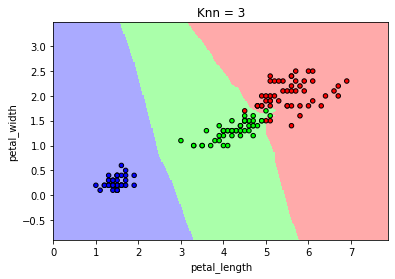

x_min: 0.0 x_max: 7.9 y_min: -0.9 y_max: 3.5


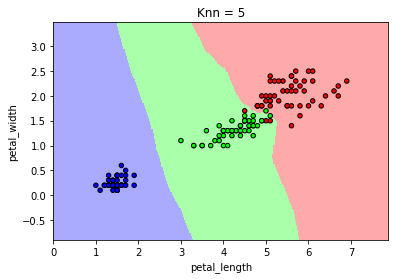

x_min: 0.0 x_max: 7.9 y_min: -0.9 y_max: 3.5


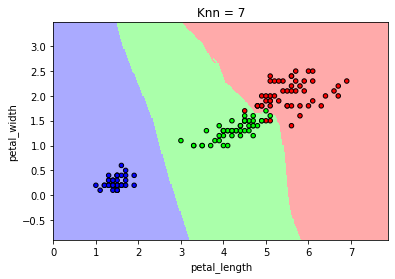

x_min: 0.0 x_max: 7.9 y_min: -0.9 y_max: 3.5


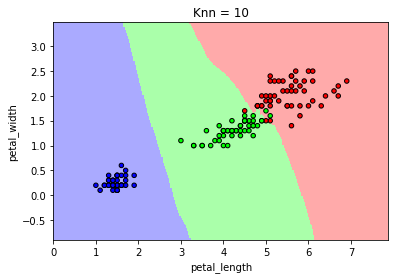

In [6]:
from collections import Counter

#df = pd.read_csv('pima-indians-diabetes.data.csv')
df = pd.read_csv('iris_data.csv')
print(Counter(df.values[:,-1]))

#2 clases. ploter_knn tienen solo 3 colores. En caso de haber mas caso, añadir mas colores a la lista.
from sklearn.neighbors import KNeighborsClassifier
df_pca = get_PCA(df, 2)
df_2_petal = get_2_features(df, "petal_length", "petal_width")

for i in [3,5,7,10]:
    knn = KNeighborsClassifier(n_neighbors=i)
    plot_knn(knn, df_2_petal, "Knn = " + str(i))

# Decision Tree Ploter
### Importante: El df tiene que tener 2 fatures + target. Una manera rapida de conseguir 2 features es usando PCA (get_PCA) o get_2_features

x_min: 3.3 x_max: 8.9 y_min: 1.0 y_max: 5.4


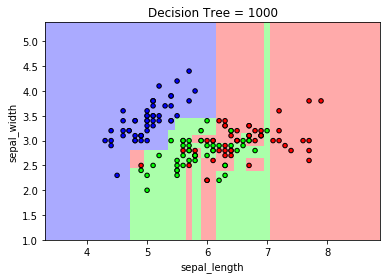

In [7]:
from sklearn.tree import DecisionTreeClassifier

df_2_petal = get_2_features(df, "sepal_length", "sepal_width")

dtree = DecisionTreeClassifier(max_depth=1000)
plot_decision_tree(dtree, df_2_petal, "Decision Tree = " + str(1000))

# SVM Forest Ploter
### Importante: El df tiene que tener 2 fatures + target. Una manera rapida de conseguir 2 features es usando PCA (get_PCA) o get_2_features

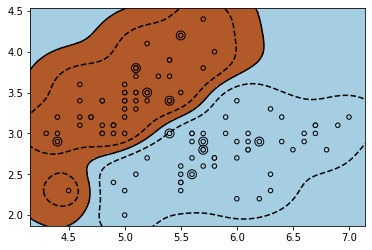

In [8]:
from sklearn.svm import SVC
df_copy = df.copy()

# Cambia las categorias por numeros
categories = df_copy[df_copy.columns[-1]].unique()
for i in range(len(categories)):
    df_copy[df_copy.columns[-1]].replace(categories[i], i, inplace=True)

X = get_2_features(df_copy, "sepal_length", "sepal_width").values[:,:-1]
y = df_copy.values[:,-1]

# Use only 2 classes and 2 variables
X = X[y != 0, :2]
y = y[y != 0]

np.random.seed(0)
n_sample = len(X)

order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(np.float)


X_train = X[:int(.9 * n_sample)]
y_train = y[:int(.9 * n_sample)]
X_test = X[int(.9 * n_sample):]
y_test = y[int(.9 * n_sample):]


df_train = pd.DataFrame(X_train, columns=["sepal_length", "sepal_width"])
df_train.insert(len(df_train.columns), df_copy.columns[-1], y_train)

df_test = pd.DataFrame(X_test, columns=["sepal_length", "sepal_width"])
df_test.insert(len(df_test.columns), df_copy.columns[-1], y_test)

svc = SVC(kernel="rbf", gamma=10, degree=3)
plot_svm(svc, df_train, df_test, "")

# Label Encoder 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [37]:
#With strings
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
print("classes: " + str(list(le.classes_)))
print("encoded: " + str(list(le.transform(["tokyo", "tokyo", "paris"]))))
print("decoded: " + str(list(le.inverse_transform([2, 2, 1]))))

classes: ['amsterdam', 'paris', 'tokyo']
encoded: [2, 2, 1]
decoded: ['tokyo', 'tokyo', 'paris']


In [40]:
df = pd.read_csv("mushroom.csv")
label_enc_arr = []
print("======================================================")
for i in range(len(df.columns)):
    column = df.columns[i]
    labelencoder=LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])
    label_enc_arr.append(labelencoder)
    
print(df.head(3))
print("======================================================")

for i in range(len(df.columns)):
    column = df.columns[i]
    labelencoder=label_enc_arr[i]
    df[column] = labelencoder.inverse_transform(df[column])
    
    
print(df.head(3))

   Unnamed: 0  cap-surface  stalk-root  stalk-surface-below-ring  stalk-shape  \
0           0            2           1                         2            1   
1           1            2           3                         2            1   
2           2            0           3                         2            0   

   veil-type  gill-size  bruises  stalk-color-below-ring  \
0          0          1        1                       7   
1          0          0        0                       7   
2          0          1        0                       7   

   stalk-color-above-ring  ...  veil-color  gill-spacing  odor  ring-type  \
0                       7  ...           0             1     3          4   
1                       7  ...           0             1     5          0   
2                       7  ...           0             0     5          4   

   spore-print-color  gill-attachment  cap-color  habitat  class  d-var  
0                  3                1          9   

In [10]:
#With integers
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])
print("classes: " + str(list(le.classes_)))
print("encoded: " + str(list(le.transform([1, 2, 2, 6]))))
print("decoded: " + str(list(le.inverse_transform([0, 0, 1, 2]))))

classes: [1, 2, 6]
encoded: [0, 1, 1, 2]
decoded: [1, 1, 2, 6]


# Ploting lavadora 

DEBUG: 2 princiapl components
x_min: -4.225200446274981 x_max: 4.794686861209971 y_min: -2.26249195386214 y_max: 2.3705240359763344


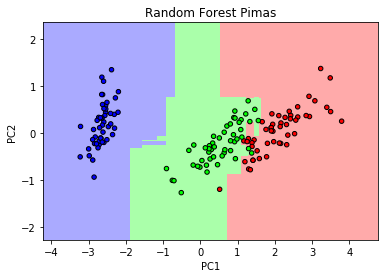

In [29]:
#0.7810457516339869	 random_forest	 {'random_state': 46079990, 'max_depth': None, 'criterion': 'entropy', 'n_estimators': 500}
df = pd.read_csv('iris_data.csv')
rf = RandomForestClassifier(random_state = 46079990, max_depth = None, criterion = 'entropy', n_estimators = 4)
df_pca = get_PCA(df, 2)
plot_random_forest(rf, df_pca, "Random Forest Pimas")

DEBUG: 2 princiapl components
x_min: -92.6345625822412 x_max: 768.3695798297728 y_min: -87.33241352295778 y_max: 115.85792507410176


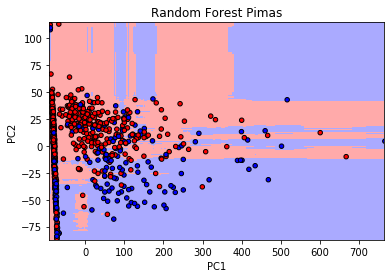